# Exercise 2.3

In [157]:
import matplotlib.pyplot as plt
import mlb as mlb
import numpy as np

## General setup

In [158]:
rng = np.random.default_rng(3317)
plt.style.use("ggplot")

## Parameters for experiment

In [159]:
n = 1000
delta = 0.01

p_hats = np.linspace(0.0, 1.0, 1001)  # e.g. 0, 0.001, … ,1

## Compute upper bounds

In [ ]:
# kl
kl_upper = np.array([mlb.kl_upper_bound(ph, n, delta) for ph in p_hats])

# Hoeffding
epsilon = np.sqrt(np.log(1.0 / delta) / (2.0 * n))
hoeffding_upper = np.clip(p_hats + epsilon, 0.0, 1.0)

# Reﬁned Pinsker’s inequality
last_term = 2.0 * np.log(1.0 / delta) / n
refined_pinsker_tmp = (
    p_hats + np.sqrt((2.0 * p_hats * np.log(1.0 / delta)) / n) + last_term
)
refined_pinsker = np.clip(refined_pinsker_tmp, 0.0, 1.0)


In [161]:
def plot_bounds(
    x,
    kl,
    hoeffding,
    pinsker=None,
    refined_pinsker=None,
    bound="Upper",
    image="",
    savefig=False,
):
    lw = 2.5
    plt.figure(figsize=(12, 7))
    plt.plot(x, kl, color="#2ca02c", lw=lw, label="KL")
    linestyle_hoeffding = (0, (6, 6))
    if pinsker is None:
        linestyle_hoeffding = "solid"
    plt.plot(
        x,
        hoeffding,
        color="#1f77b4",
        lw=lw,
        linestyle=linestyle_hoeffding,
        label="Hoeffding",
    )
    if pinsker is not None:
        plt.plot(
            x,
            pinsker,
            color="#d62728",
            lw=lw,
            linestyle=(6, (6, 6)),
            label="Pinsker",
        )
    if refined_pinsker is not None:
        plt.plot(x, refined_pinsker, color="#9467bd", lw=lw, label="Refined Pinsker")
    plt.plot(x, x, "--", color="gray", alpha=0.5, label=r"$p = \hat p$")
    plt.xlabel(r"Empirical mean $\hat{p}_n$")
    plt.ylabel(f"{bound} bound on $p$")
    plt.legend()
    plt.tight_layout()
    if savefig:
        plt.savefig(f"./figures/{image}.pdf", dpi=600, bbox_inches="tight")
    plt.show()


## Plot

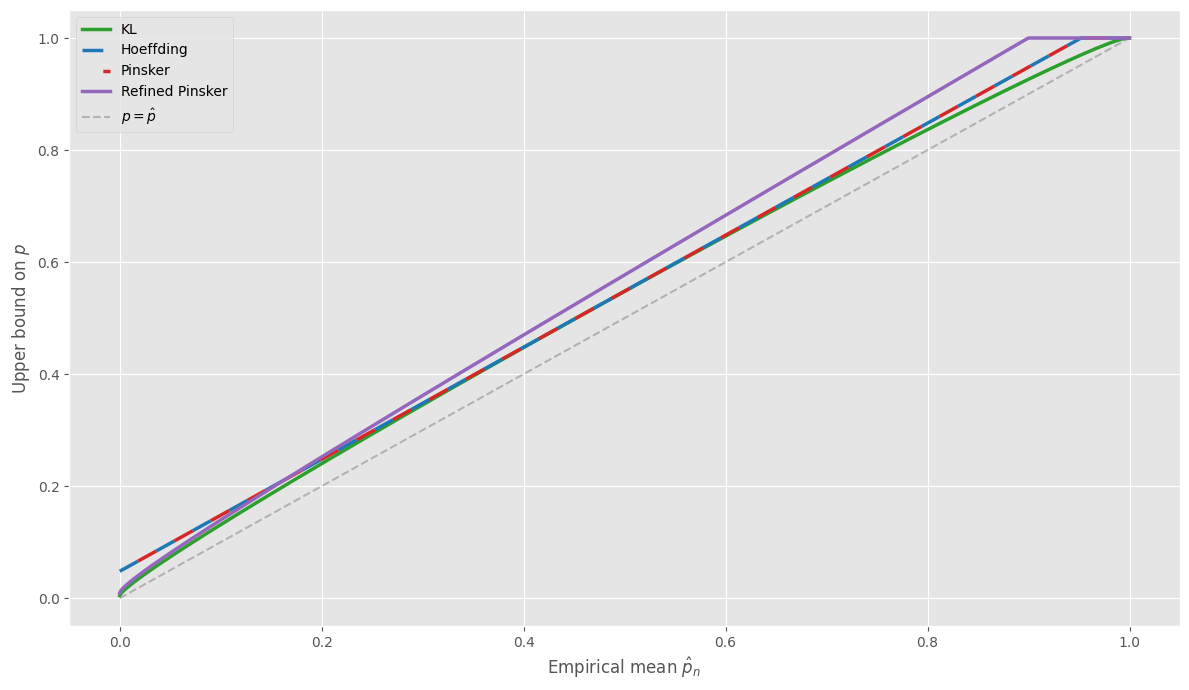

In [ ]:
plot_bounds(
    p_hats,
    kl_upper,
    hoeffding_upper,
    hoeffding_upper,
    refined_pinsker,
    "Upper",
    "upper_bounds",
    savefig=False,
)

## "Zoom in" plot

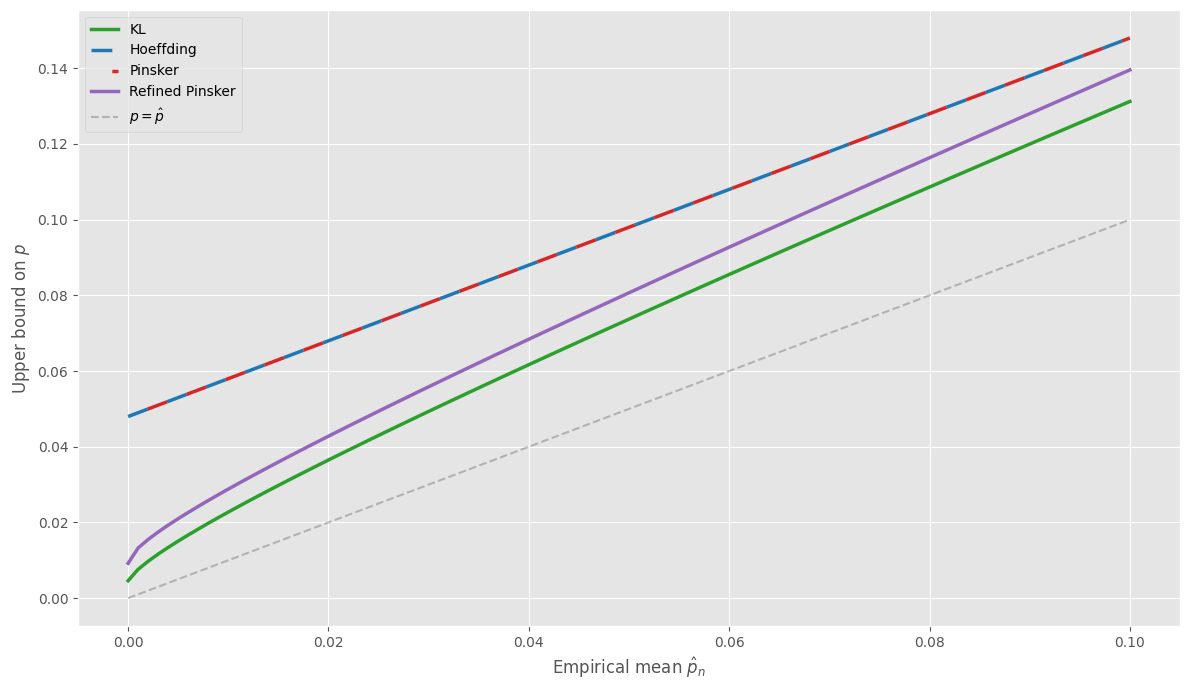

In [ ]:
plot_bounds(
    p_hats[:101],
    kl_upper[:101],
    hoeffding_upper[:101],
    hoeffding_upper[:101],
    refined_pinsker[:101],
    "Upper",
    "zoomed_in_upper_bounds",
    savefig=False,
)

## Compute lower bounds

### Test that the 2 ways of computing lower bounds are identical

In [164]:
mlb.test_lower_bounds()

All lower–bound tests passed (204 points).


In [ ]:
# kl
kl_lower = np.array([mlb.kl_lower_bound_symm(ph, n, delta) for ph in p_hats])

# Hoeffding
epsilon = np.sqrt(np.log(1.0 / delta) / (2.0 * n))
hoeffding_lower = np.clip(p_hats - epsilon, 0.0, 1.0)


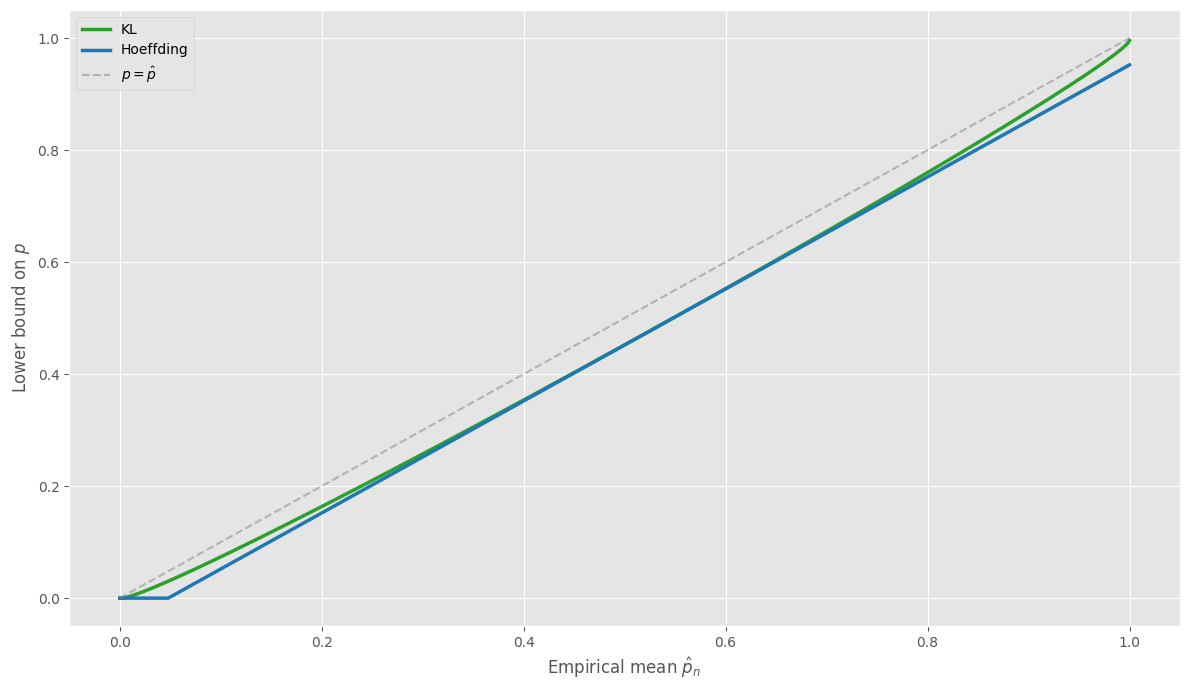

In [ ]:
plot_bounds(
    p_hats,
    kl_lower,
    hoeffding_lower,
    None,
    None,
    "Lower",
    "lower_bounds",
    savefig=False,
)